### 선형 모델

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

from IPython.display import display
import numpy as np
import pandas as pd
import mglearn
from sklearn.datasets import make_blobs

In [3]:
import platform
import matplotlib.pyplot as plt
%matplotlib inline

path="c:/Windows/Fonts/malgun.ttf"

from matplotlib import font_manager, rc
if platform.system()=='Darwin':
    rc('font',family='AppleGothic')
elif platform.system()=='Windows':
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unknown')
plt.rcParams['axes.unicode_minus']=False

w[0]: 0.393906  b: -0.031804


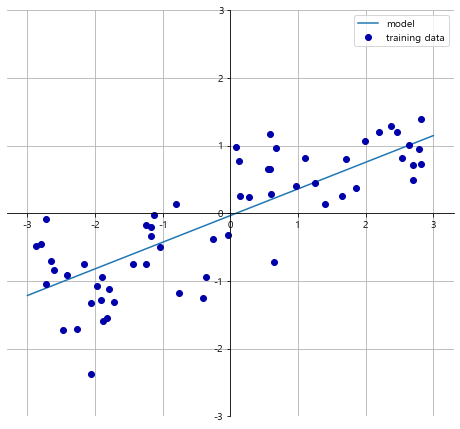

In [5]:
mglearn.plots.plot_linear_regression_wave()

> ### 선형 회귀(최소제곱법)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
x_train, x_test, y_train, y_test= train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(x_train, y_train)

In [8]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_:-0.031804343026759746


In [9]:
print("훈련 세트 점수: {:.2f}".format(lr.score(x_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(x_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


R-squared의 값이 0.66 인 것은 그리 좋은 결과는 아니지만, train과 test set의 점수가 매우 비슷하다. 이는 과소적합인 상태를 의미한다.

In [10]:
X, y = mglearn.datasets.load_extended_boston()

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(x_train, y_train)

In [12]:
print("훈련 세트 점수: {:.2f}".format(lr.score(x_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(x_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


위와 같은 성능 차이는 모델이 과대적합 되었다는 신호이다.

> ### Ridge   
ridge에서의 가중치(w) 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있다.   
가중치의 절댓값을 가능한 한 작게 만드는 것이다. 즉, w의 모든 원소가 0에 가깝게 되길 원한다.   
모든 특성이 출력에 주는 영향을 최소한으로 만들며, 이런 제약을 regularization이라고 한다.   
regularization이란 과대 적합이 되지 않도록 모델을 강제로 제한한다는 의미이며, ridge에서 사용하는 규제 방식을 L2 규제라고 한다.

In [13]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(x_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(x_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(x_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


#### linear regression 보다 훈련 세트 점수는 낮지만, 테스트 세트 점수는 높은 것을 확인할 수 있다.    
#### ridge는 모델을 단순하게 해주고 train 세트에 대한 성능 사이를 절출할 수 있는 방법을 제공한다.    
#### 사용자는 alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할지를 지정할 수 있다.    
#### 위의 예제는 alpha=1.0 을 사용하였고, 최적의 alpha 값은 사용하는 데이터셋에 달려있다.     
#### alpha 값을 높이면 계수를 0에 더 가깝게 만들어서 train 세트의 성능은 나빠지지만, 일반화에는 도움을 줄 수 있다.

In [15]:
ridge10 = Ridge(alpha=10).fit(x_train, y_train)
print("train set score: {:.2f}".format(ridge10.score(x_train, y_train)))
print("test set score: {:.2f}".format(ridge10.score(x_test, y_test)))

train set score: 0.79
test set score: 0.64


In [16]:
ridge01 = Ridge(alpha=0.1).fit(x_train, y_train)
print("train set score: {:.2f}".format(ridge01.score(x_train, y_train)))
print("test set score: {:.2f}".format(ridge01.score(x_test, y_test)))

train set score: 0.93
test set score: 0.77


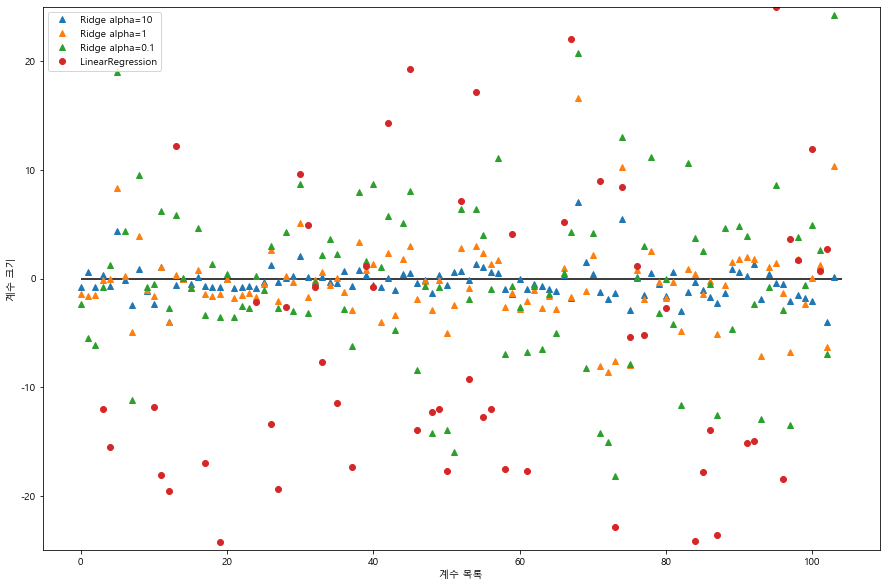

In [24]:
plt.figure(figsize=(15,10))
plt.plot(ridge10.coef_, '^', label = "Ridge alpha=10")
plt.plot(ridge.coef_, '^', label = "Ridge alpha=1")
plt.plot(ridge01.coef_, '^', label = "Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0,0, len(lr.coef_))
plt.ylim(-25,25)
plt.legend();

x축은 coef_의 원소를 위치대로 나열한 것이다. x=0은 첫 번째 특성에 연관된 계수이고 x=1은 두 번째 특성에 연관된 계수이다.   
y축은 각 계수의 수치를 나타낸다. alpha=10일 때 대부분의 계수는 -3과 3사이에 위치한다. alpha=0.1일때 계수는 더욱 커지며, 아무런 규제가 없는(alpha=0) 선현 회귀의 계수는 값이 더 커져 그림 밖으로 넘어간다.

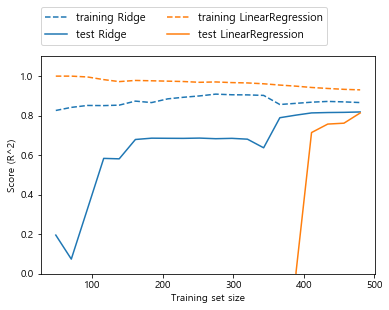

In [25]:
mglearn.plots.plot_ridge_n_samples()

ridge와 linear regression 모두 train set에서의 점수가 test set보다 높으며, ridge의 test set 점수가 전체적으로 더 높다.   
두 모델의 성능은 데이터가 많아질수록 좋아지고 마지막에는 선형 회귀가 릿지 회귀를 따라잡는다. 즉, 데이터를 충분히 주면 규제 항은 덜 중요해져, 릿지와 선형 회귀의 성능이 같아질 것이다.    
그리고 선형 회귀의 train set의 성능이 감소한다는 것인데, 이는 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 때문이다.

> ### Lasso
Ridge의 대안으로 Lasso가 있고, 라쏘도 계수를 0에 가깝게 만들려고 한다. 하지만 방식이 조금 다르며 이를 L1 규제라고 한다.   
L1 규제의 결과로 라쏘를 사용할 때 어떤 계수는 정말 0이 된다. 즉 모델에서 완전히 제외되는 특성이 생긴다는 뜻이다.   
어떻게 보면 feature selection이 자동으로 이뤄진다고 볼 수 있다. 일부 계수를 0으로 만들면 모델을 이해하기 쉬워지고 이 모델의 가장 중요한 특성이 무엇인지 드러내준다.

In [26]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(x_train, y_train)
print("train set score: {:.2f}".format(lasso.score(x_train, y_train)))
print("test set score: {:.2f}".format(lasso.score(x_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso.coef_ != 0)))

train set score: 0.29
test set score: 0.21
사용한 특성의 수: 4


Lasso에서의 결과가 좋지 않은 것을 볼 수 있다. 이는 과소 적합이며 104개의 특성 중 4개만 사용한 것을 볼 수 있다.    
Lasso에서도 ridge와 같이 alpha 매개 변수를 지원한다.

In [27]:
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(x_train, y_train)
print("train set score: {:.2f}".format(lasso001.score(x_train, y_train)))
print("test set score: {:.2f}".format(lasso001.score(x_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso001.coef_ != 0)))

train set score: 0.90
test set score: 0.77
사용한 특성의 수: 33


alpha 값을 너무 낮추면 규제의 효과가 없어져 과대적합이 되므로 linear regression의 결과와 비슷해진다.

In [28]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(x_train, y_train)
print("train set score: {:.2f}".format(lasso00001.score(x_train, y_train)))
print("test set score: {:.2f}".format(lasso00001.score(x_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso00001.coef_ != 0)))

train set score: 0.95
test set score: 0.64
사용한 특성의 수: 96


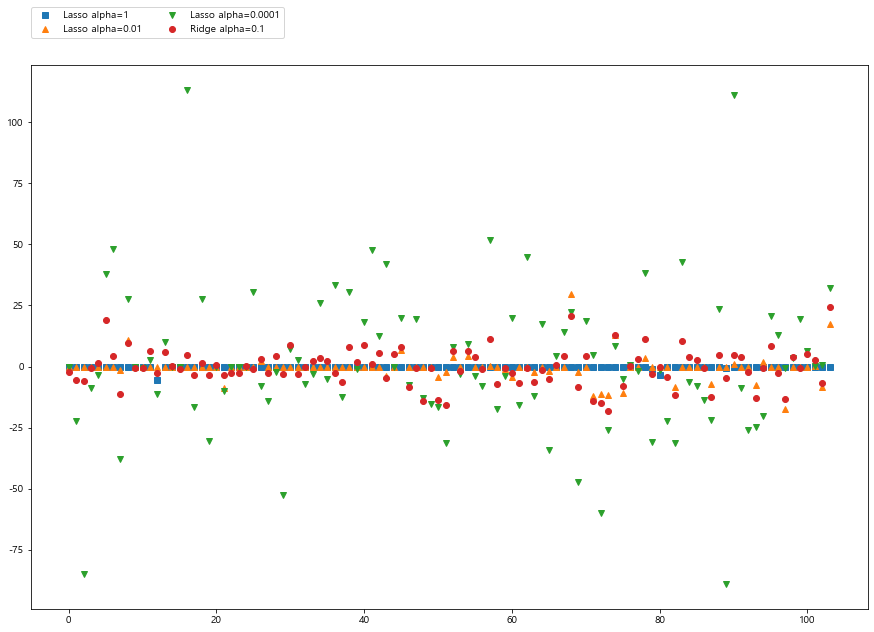

In [32]:
plt.figure(figsize=(15,10))
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05));

보통 lasso와 ridge 중 ridge를 더 선호한다. 하지만 특성이 많고 그중 일부분만 중요하다면 lasso가 더 좋은 선택일 수 있다.    
또한 분석하기 쉬운 모델을 원한다면 lasso가 쉽게 해석할 수 있는 모델을 만들어 줄 것이다.